In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
raw_data = pd.read_csv(r"C:\Users\user\Desktop\MAL Anime Top 10000 Details.csv.zip")
new_data = pd.DataFrame(raw_data[["Anime Title","Type","Episodes","Aired","Producers","Studios",
                                  "Source","Genres","Score","Members","Favorites"]])
TV_data = new_data.loc[new_data["Type"]=="TV"]
Movie_data = new_data.loc[new_data["Type"]=="Movie"]

Anime Title - title of the anime

Type - Type of anime(OVA/TV/etc)

Episodes - number of episodes

Aired - time frame of airing

Producers - producers of the anime

Studios - studio responsible for anime creation

Source - source from which anime was adapted from

Genres - genre of anime

Score - MAL score for the anime to perform uni-varaiate analysis

Members - number of members registered for anime to perform uni-varaiate analysis

Favourites - number of members who favourited the anime to perform uni-varaiate analysis

TO DO

Create a new column as percentage of favourites out of all members DONE

Use studio/source/genre as entry varaibles

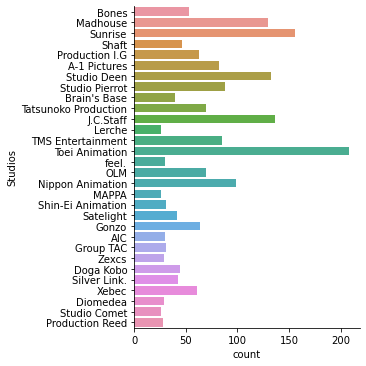

In [3]:
sb.catplot(y = 'Studios', data = TV_data[TV_data.groupby('Studios').Studios.transform('count') > 25], kind='count')

In [4]:
TV_Studios_array=TV_data["Studios"].unique()
np.where(TV_Studios_array == TV_data["Studios"].iloc[27])[0][0]

11

In [5]:
TV_data["Genres"].iloc[0]

'Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen'

# 06/03 
## Convert source to int and compress them together
## Extracted genre top 2

### To-do
### Data cleaning for seasons (use Aired) and studio (some NULL)
### Convert genre to int (google "all anime genres")

In [6]:
source = TV_data['Source']
genres = TV_data['Genres']
score = TV_data['Score']
members = pd.DataFrame(TV_data['Members'])
fav = TV_data['Favorites']

In [7]:
TV_data.insert(loc=11, column='Fav%', value=round(TV_data['Favorites']*100/TV_data['Members'], 3))

In [8]:
source.unique()

array(['Manga', 'Visual novel', 'Light novel', 'Original', 'Web manga',
       'Novel', '4-koma manga', 'Card game', 'Book', 'Game', 'Other',
       'Unknown', 'Music', 'Picture book', 'Digital manga', 'Radio'],
      dtype=object)

Convert source to an int, total of 16 sources. Compress some sources together

0 - All manga + Picture book

1 - Novel, Light Novel, Book

2 - All game + Visual novel

3 - Other + Unknown

4 - Music + Radio

5 - Original

In [9]:
source_list = source.tolist() #list of sources based on index in Tv_data
source_list_unique = ["Manga", "Novel", "Game", "Other", "Audio", "Original"] #compresed source_reference list

In [ ]:
a = [0] * len(TV_data)
for i in range(len(source_list)):
    if source_list[i] in ["Manga", "Web manga", "4-koma manga", "Digital manga", "Picture book"]:
        a[i] = source_list_unique.index("Manga")
    elif source_list[i] in ["Visual novel", "Light novel", "Book"]:
        a[i] = source_list_unique.index("Novel")
    elif source_list[i] in ["Card game", "Game", "Visual novel"]:
        a[i] = source_list_unique.index("Game")
    elif source_list[i] in ["Other", "Unknown"]:
        a[i] = source_list_unique.index("Other")
    elif source_list[i] in ["Radio", "Music"]:
        a[i] = source_list_unique.index("Audio")
    elif source_list[i] == "Original":
        a[i] = source_list_unique.index("Original")
TV_data["Source_reference"] = a

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree 

def decTree(y, x, depth):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)    
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, Y_train)
    Y_train_pred = dectree.predict(X_train)
    Y_test_pred = dectree.predict(X_test)
    cm = confusion_matrix(Y_train, Y_train_pred)
    TP = cm[1][1]/(cm[1][1] + cm[1][0])
    FP = cm[0][1]/(cm[0][1] + cm[0][0])
    cm1 = confusion_matrix(Y_test, Y_test_pred)
    TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
    FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
    #print("True Positive Rate \t:", TP)
    #print("False Positive Rate\t:", FP)
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
    #print("True Positive Rate \t:", TP1)
    #print("False Positive Rate\t:", FP1)
    print()
    f, axes = plt.subplots(1, 2, figsize=(24, 48))
    sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    f = plt.figure(figsize=(48,48))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names="Fav%", 
              class_names=["0","1","2","3","4","5"])

In [ ]:
decTree(TV_data["Source_reference"].to_numpy().reshape(-1,1),TV_data["Fav%"].to_numpy().reshape(-1,1),3)

In [32]:
b = [0] *3681
for i in range(3681):
    word = TV_data["Genres"].iloc[i]
    w = word.split(', ')
    b[i] = w[0]
TV_data["Genre_reference"] = b
TV_data

<ipython-input-32-07553aeba7b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["Genre_reference"] = b


,Anime Title,Type,Episodes,Aired,Producers,Studios,Source,Genres,Score,Members,Favorites,Fav%,Genre_reference
0,Fullmetal Alchemist: Brotherhood,TV,64,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",9.22,2025613,167812,8.285,Action
1,Steins;Gate,TV,24,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,Visual novel,"Thriller, Sci-Fi",9.12,1636151,139909,8.551,Thriller
2,Gintama°,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.11,363879,10353,2.845,Action
3,Hunter x Hunter (2011),TV,148,"Oct 2, 2011 to Sep 24, 2014","VAP, Nippon Television Network, Shueisha",Madhouse,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",9.11,1459320,130492,8.942,Action
5,Gintama',TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,Manga,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",9.08,337198,6013,1.783,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,Barom One,TV,13,"Dec 7, 2002 to Mar 22, 2003",AT-X,E&G Films,Manga,"Action, Sci-Fi, Supernatural, Shounen",5.25,1576,1,0.063,Action
9983,Kurayami Santa,TV,13,"Jul 5, 2015 to Sep 27, 2015",NaN,ILCA,Original,"Historical, Supernatural",5.25,2392,6,0.251,Historical
9985,Omae wa Mada Gunma wo Shiranai,TV,12,"Apr 2, 2018 to Jun 18, 2018",TOHO animation,Asahi Production,Web manga,"Comedy, School",5.25,11760,2,0.017,Comedy
9987,Peeping Life,TV,10,"May 14, 2009 to Aug 11, 2009",CoMix Wave Films,NaN,Original,"Slice of Life, Comedy",5.25,2481,3,0.121,Slice of Life


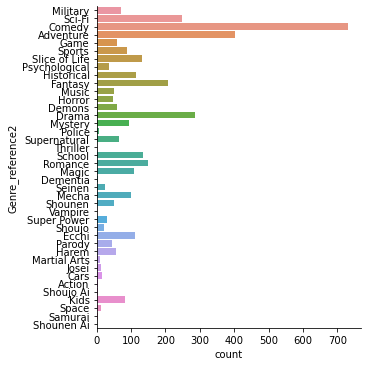

In [38]:
sb.catplot(y="Genre_reference2", data = TV_data, kind = 'count')

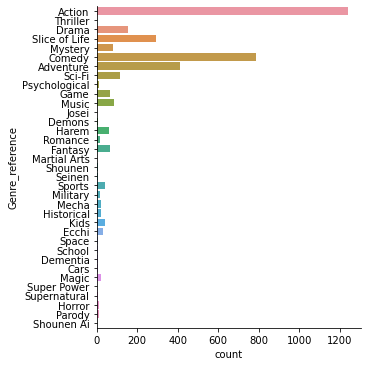

In [39]:
sb.catplot(y="Genre_reference", data = TV_data, kind = 'count')

In [37]:
c = [0] *3681
for i in range(3681):
    word = TV_data["Genres"].iloc[i]
    w = word.split(', ')
    if(len(w)>1):
        c[i] = w[1]
    else:
        c[i] = w[0]
TV_data["Genre_reference2"] = c
TV_data

<ipython-input-37-9519e9bf7fcb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["Genre_reference2"] = c


,Anime Title,Type,Episodes,Aired,Producers,Studios,Source,Genres,Score,Members,Favorites,Fav%,Genre_reference,Genre_reference2
0,Fullmetal Alchemist: Brotherhood,TV,64,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",9.22,2025613,167812,8.285,Action,Military
1,Steins;Gate,TV,24,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,Visual novel,"Thriller, Sci-Fi",9.12,1636151,139909,8.551,Thriller,Sci-Fi
2,Gintama°,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.11,363879,10353,2.845,Action,Comedy
3,Hunter x Hunter (2011),TV,148,"Oct 2, 2011 to Sep 24, 2014","VAP, Nippon Television Network, Shueisha",Madhouse,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",9.11,1459320,130492,8.942,Action,Adventure
5,Gintama',TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,Manga,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",9.08,337198,6013,1.783,Action,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,Barom One,TV,13,"Dec 7, 2002 to Mar 22, 2003",AT-X,E&G Films,Manga,"Action, Sci-Fi, Supernatural, Shounen",5.25,1576,1,0.063,Action,Sci-Fi
9983,Kurayami Santa,TV,13,"Jul 5, 2015 to Sep 27, 2015",NaN,ILCA,Original,"Historical, Supernatural",5.25,2392,6,0.251,Historical,Supernatural
9985,Omae wa Mada Gunma wo Shiranai,TV,12,"Apr 2, 2018 to Jun 18, 2018",TOHO animation,Asahi Production,Web manga,"Comedy, School",5.25,11760,2,0.017,Comedy,School
9987,Peeping Life,TV,10,"May 14, 2009 to Aug 11, 2009",CoMix Wave Films,NaN,Original,"Slice of Life, Comedy",5.25,2481,3,0.121,Slice of Life,Comedy
